# pycaret을 이용한 가스공급량 예측
* 2019년 test 데이터 : '../data/test.csv'
* 2013-2018년 가스공급량자료 : '../data/한국가스공사_시간별 공급량_20181231.csv'
* 2013-2018년 기상청기온자료 : '../기상청기온자료/2013-2018년_기상청기온자료02.csv'
* 사용 특성 : 'month', 'day', '시간', '구분', '기온','습도','기압'
* log, poly 적용
* top3 모델 결과 평균으로 제출

## 데이터 가져오기
* 2019년 test 데이터 : '../data/test.csv'
* 2013-2018년 가스공급량자료 : '../data/한국가스공사_시간별 공급량_20181231.csv'
* 2013-2018년 기상청기온자료 : '../기상청기온자료/2013-2018년_기상청기온자료02.csv'

In [1]:
import pandas as pd

#### 기온데이터

In [2]:
raw_temp_data = pd.read_csv('../기상청기온자료/2013-2018년_기상청기온자료02.csv')
raw_temp_data.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2013-01-01 01,-8.5,NaN,4.0,50.0,57.0,1.8,-15.5,1010.0,...,NaN,NaN,NaN,NaN,NaN,-3.4,-2.9,-1.6,-0.5,0.3
1,108,2013-01-01 02,-8.4,NaN,4.0,70.0,60.0,2.0,-14.7,1009.4,...,NaN,NaN,NaN,NaN,NaN,-3.4,-3.0,-1.6,-0.5,0.4
2,108,2013-01-01 03,-8.1,NaN,3.4,70.0,58.0,1.9,-14.9,1009.2,...,Ac,35.0,2000.0,13.0,NaN,-3.4,-3.0,-1.6,-0.5,0.3
3,108,2013-01-01 04,-8.2,NaN,3.8,70.0,58.0,1.9,-15.0,1008.2,...,Ac,35.0,2000.0,NaN,NaN,-3.4,-2.9,-1.7,-0.5,0.3
4,108,2013-01-01 05,-8.2,NaN,4.4,70.0,61.0,2.0,-14.4,1007.3,...,ScAs,10.0,1000.0,NaN,5.0,-3.3,-2.9,-1.7,-0.5,0.3


In [3]:
raw_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             52584 non-null  int64  
 1   일시             52584 non-null  object 
 2   기온(°C)         52584 non-null  float64
 3   강수량(mm)        4944 non-null   float64
 4   풍속(m/s)        52538 non-null  float64
 5   풍향(16방위)       52538 non-null  float64
 6   습도(%)          52584 non-null  float64
 7   증기압(hPa)       52572 non-null  float64
 8   이슬점온도(°C)      52572 non-null  float64
 9   현지기압(hPa)      52584 non-null  float64
 10  해면기압(hPa)      52580 non-null  float64
 11  일조(hr)         28716 non-null  float64
 12  일사(MJ/m2)      28529 non-null  float64
 13  적설(cm)         2394 non-null   float64
 14  3시간신적설(cm)     153 non-null    float64
 15  전운량(10분위)      41808 non-null  float64
 16  중하층운량(10분위)    45458 non-null  float64
 17  운형(운형약어)       29442 non-null  object 
 18  최저운고(1

In [4]:
temp_data = raw_temp_data[['일시', '기온(°C)', '습도(%)', '현지기압(hPa)']]
temp_data.head()

,일시,기온(°C),습도(%),현지기압(hPa)
0,2013-01-01 01,-8.5,57.0,1010.0
1,2013-01-01 02,-8.4,60.0,1009.4
2,2013-01-01 03,-8.1,58.0,1009.2
3,2013-01-01 04,-8.2,58.0,1008.2
4,2013-01-01 05,-8.2,61.0,1007.3


In [5]:
temp_data.columns = ['일시', '기온', '습도', '기압']
temp_data.head()

,일시,기온,습도,기압
0,2013-01-01 01,-8.5,57.0,1010.0
1,2013-01-01 02,-8.4,60.0,1009.4
2,2013-01-01 03,-8.1,58.0,1009.2
3,2013-01-01 04,-8.2,58.0,1008.2
4,2013-01-01 05,-8.2,61.0,1007.3


In [6]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      52584 non-null  object 
 1   기온      52584 non-null  float64
 2   습도      52584 non-null  float64
 3   기압      52584 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


In [7]:
temp_data[['year', 'month', 'day', '시간']] = temp_data['일시'].str.split(r'-| ').tolist()
temp_data.head()

<ipython-input-7-f48c8d9df3bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data[['year', 'month', 'day', '시간']] = temp_data['일시'].str.split(r'-| ').tolist()
C:\Users\kbjoo\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,일시,기온,습도,기압,year,month,day,시간
0,2013-01-01 01,-8.5,57.0,1010.0,2013,01,01,01
1,2013-01-01 02,-8.4,60.0,1009.4,2013,01,01,02
2,2013-01-01 03,-8.1,58.0,1009.2,2013,01,01,03
3,2013-01-01 04,-8.2,58.0,1008.2,2013,01,01,04
4,2013-01-01 05,-8.2,61.0,1007.3,2013,01,01,05


#### 2019년 데이터

In [8]:
test2019 = pd.read_csv('../data/test.csv')
test2019.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [9]:
test2019[['연월일', '시간', '구분']] = test2019['일자|시간|구분'].str.split(' ').tolist()
test2019.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,01,A
1,2019-01-01 02 A,2019-01-01,02,A
2,2019-01-01 03 A,2019-01-01,03,A
3,2019-01-01 04 A,2019-01-01,04,A
4,2019-01-01 05 A,2019-01-01,05,A


In [10]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(test2019['구분'].unique()):
    d_map[d] = i
test2019['구분'] = test2019['구분'].map(d_map)
test2019.head()

,일자|시간|구분,연월일,시간,구분
0,2019-01-01 01 A,2019-01-01,01,0
1,2019-01-01 02 A,2019-01-01,02,0
2,2019-01-01 03 A,2019-01-01,03,0
3,2019-01-01 04 A,2019-01-01,04,0
4,2019-01-01 05 A,2019-01-01,05,0


In [11]:
# 연월일 열은 object형이므로 년, 월, 일로 나눈다.
test2019['연월일'] = pd.to_datetime(test2019['연월일'])
test2019['year'] = test2019['연월일'].dt.year
test2019['month'] = test2019['연월일'].dt.month
test2019['day'] = test2019['연월일'].dt.day
test2019['weekday'] = test2019['연월일'].dt.weekday
test2019.head()

,일자|시간|구분,연월일,시간,구분,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,01,0,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,02,0,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,03,0,2019,1,1,1
3,2019-01-01 04 A,2019-01-01,04,0,2019,1,1,1
4,2019-01-01 05 A,2019-01-01,05,0,2019,1,1,1


#### 가스공급량 데이터

In [12]:
raw_gas_data = pd.read_csv('../data/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')
raw_gas_data.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [13]:
raw_gas_data['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [14]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(raw_gas_data['구분'].unique()):
    d_map[d] = i
raw_gas_data['구분'] = raw_gas_data['구분'].map(d_map)
raw_gas_data.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,0,2497.129
1,2013-01-01,2,0,2363.265
2,2013-01-01,3,0,2258.505
3,2013-01-01,4,0,2243.969
4,2013-01-01,5,0,2344.105


In [15]:
# 연월일 열은 object형이므로 년, 월, 일로 나눈다.
raw_gas_data['연월일'] = pd.to_datetime(raw_gas_data['연월일'])
raw_gas_data['year'] = raw_gas_data['연월일'].dt.year
raw_gas_data['month'] = raw_gas_data['연월일'].dt.month
raw_gas_data['day'] = raw_gas_data['연월일'].dt.day
raw_gas_data['weekday'] = raw_gas_data['연월일'].dt.weekday
raw_gas_data.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1


#### 2013-2018년 가스공급량과 기온 데이터 합치기

In [16]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      52584 non-null  object 
 1   기온      52584 non-null  float64
 2   습도      52584 non-null  float64
 3   기압      52584 non-null  float64
 4   year    52584 non-null  object 
 5   month   52584 non-null  object 
 6   day     52584 non-null  object 
 7   시간      52584 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.2+ MB


In [17]:
temp_data[['year','month','day','시간']] = temp_data[['year','month','day','시간']].astype(int)
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      52584 non-null  object 
 1   기온      52584 non-null  float64
 2   습도      52584 non-null  float64
 3   기압      52584 non-null  float64
 4   year    52584 non-null  int32  
 5   month   52584 non-null  int32  
 6   day     52584 non-null  int32  
 7   시간      52584 non-null  int32  
dtypes: float64(3), int32(4), object(1)
memory usage: 2.4+ MB


C:\Users\kbjoo\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
raw_gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  int64         
 3   공급량      368088 non-null  float64       
 4   year     368088 non-null  int64         
 5   month    368088 non-null  int64         
 6   day      368088 non-null  int64         
 7   weekday  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 22.5 MB


In [19]:
gas_temp = pd.merge(raw_gas_data, temp_data, on=['year', 'month', 'day', '시간'])
gas_temp.head()

,연월일,시간,구분,공급량,year,month,day,weekday,일시,기온,습도,기압
0,2013-01-01,1,0,2497.129,2013,1,1,1,2013-01-01 01,-8.5,57.0,1010.0
1,2013-01-01,1,1,2169.093,2013,1,1,1,2013-01-01 01,-8.5,57.0,1010.0
2,2013-01-01,1,2,226.178,2013,1,1,1,2013-01-01 01,-8.5,57.0,1010.0
3,2013-01-01,1,3,1434.516,2013,1,1,1,2013-01-01 01,-8.5,57.0,1010.0
4,2013-01-01,1,4,3272.837,2013,1,1,1,2013-01-01 01,-8.5,57.0,1010.0


In [20]:
# 필요없는 열 제거
gas_temp = gas_temp.drop(['연월일', '일시'], axis=1)
gas_temp.head()

,시간,구분,공급량,year,month,day,weekday,기온,습도,기압
0,1,0,2497.129,2013,1,1,1,-8.5,57.0,1010.0
1,1,1,2169.093,2013,1,1,1,-8.5,57.0,1010.0
2,1,2,226.178,2013,1,1,1,-8.5,57.0,1010.0
3,1,3,1434.516,2013,1,1,1,-8.5,57.0,1010.0
4,1,4,3272.837,2013,1,1,1,-8.5,57.0,1010.0


In [21]:
# 열 순서 정리
gas_temp = gas_temp[['year','month','day','weekday','시간','구분', '공급량', '기온', '습도','기압']]
gas_temp.head()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
0,2013,1,1,1,1,0,2497.129,-8.5,57.0,1010.0
1,2013,1,1,1,1,1,2169.093,-8.5,57.0,1010.0
2,2013,1,1,1,1,2,226.178,-8.5,57.0,1010.0
3,2013,1,1,1,1,3,1434.516,-8.5,57.0,1010.0
4,2013,1,1,1,1,4,3272.837,-8.5,57.0,1010.0


### 상관계수 확인

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
import platform
from matplotlib import font_manager, rc

In [24]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

<AxesSubplot:>

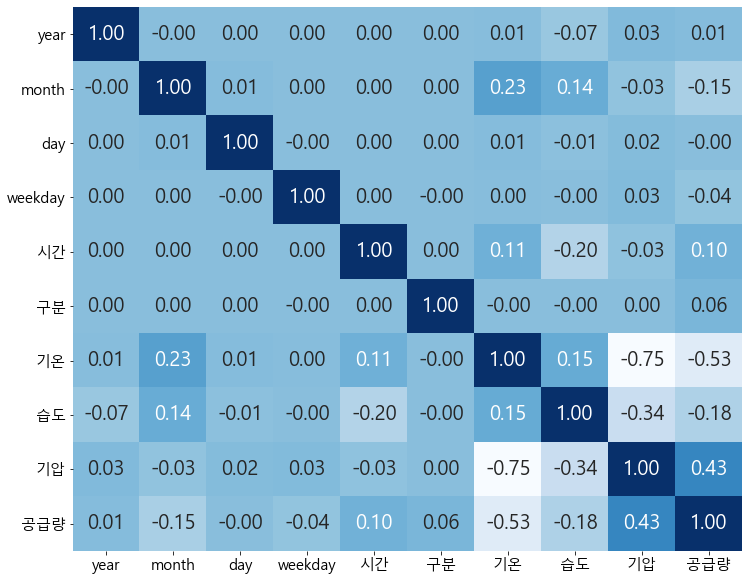

In [37]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(gas_temp[['year','month', 'day', 'weekday', '시간', '구분', '기온','습도','기압','공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

## 2019년 기온 예측하기
* 습도 예측
* 기압 예측

In [26]:
from pycaret.regression import *

#### 습도(Humidity) 예측

In [60]:
# 학습 특성 : 'month', 'day', 'weekday', '시간', '구분'
# 타겟 특성 : '습도'
exp = setup(gas_temp, target='습도', ignore_features=['공급량', 'year', '기온', '기압'], use_gpu = True)

,Description,Value
0,session_id,6526
1,Target,습도
2,Original Data,"(368088, 10)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(257661, 28)"


In [61]:
# 시간 단축을 위해 모델 3개만 이용
models3 = compare_models(sort='MAPE', n_select=3, include=['knn','catboost','lightgbm'])
# gpu사용 -> catboost 계산 안됨.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,9.5607,153.8949,12.4053,0.6127,0.2359,0.1941,10.8460
lightgbm,Light Gradient Boosting Machine,11.5049,207.9572,14.4206,0.4766,0.2714,0.2341,4.7640


In [62]:
for model in models3:
    print(model)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', importance_type='split', learning_rate=0.1,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=6526, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [56]:
tuned_models3 = [tune_model(i) for i in models3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2599,65.9207,8.1192,0.8348,0.1611,0.1269
1,6.2045,64.5822,8.0363,0.8375,0.1613,0.1267
2,6.1781,64.2828,8.0177,0.8376,0.1571,0.1235
3,6.1812,63.9878,7.9992,0.8388,0.1580,0.1247
4,6.1526,63.4254,7.9640,0.8396,0.1578,0.1242
5,6.2184,64.7007,8.0437,0.8360,0.1572,0.1238
6,6.1144,62.7384,7.9208,0.8414,0.1572,0.1235
7,6.2204,64.4342,8.0271,0.8386,0.1605,0.1265
8,6.1789,63.8916,7.9932,0.8396,0.1587,0.1249
9,6.1437,62.7237,7.9198,0.8422,0.1571,0.1240


In [57]:
blend_models3 = blend_models(estimator_list=tuned_models3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.3253,32.2587,5.6797,0.9192,0.1165,0.0878
1,4.3174,32.0018,5.6570,0.9195,0.1170,0.0882
2,4.2504,30.9792,5.5659,0.9217,0.1120,0.0849
3,4.2580,31.0110,5.5688,0.9219,0.1134,0.0859
4,4.2803,31.1947,5.5852,0.9211,0.1136,0.0862
5,4.2697,31.2968,5.5944,0.9207,0.1127,0.0852
6,4.2385,30.8059,5.5503,0.9221,0.1137,0.0857
7,4.3188,32.0212,5.6587,0.9198,0.1171,0.0882
8,4.2843,31.3378,5.5980,0.9213,0.1143,0.0865
9,4.2784,31.1214,5.5787,0.9217,0.1140,0.0865


In [58]:
humidity_prediction_model = finalize_model(blend_models3)

In [59]:
df_for_temp = gas_temp[['month', 'day', 'weekday', '시간', '구분']]
humidity_pred = predict_model(humidity_prediction_model, data=df_for_temp)

KeyError: "['기온'] not in index"

In [ ]:
humidity_pred.head()

,month,day,weekday,시간,구분,습도,기압,Label
0,1,1,1,1,0,57.0,1010.0,-7.96643
1,1,1,1,1,1,57.0,1010.0,-7.96643
2,1,1,1,1,2,57.0,1010.0,-7.96643
3,1,1,1,1,3,57.0,1010.0,-7.96643
4,1,1,1,1,4,57.0,1010.0,-7.96643


In [47]:
from pycaret.utils import check_metric
check_metric(gas_temp['습도'], humidity_pred.Label, 'MAPE')

0.1248

In [48]:
check_metric(gas_temp['습도'], humidity_pred.Label, 'MAE')

0.475

In [49]:
save_model(humidity_prediction_model, 'humidity_prediction_model_01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['공급량', 'year'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='기온',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                                             importance_type='split',
                                                             learning_rate=0.5,
                                                             max_depth=-1,
                                

In [50]:
test2019.head()

,일자|시간|구분,연월일,시간,구분,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,01,0,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,02,0,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,03,0,2019,1,1,1
3,2019-01-01 04 A,2019-01-01,04,0,2019,1,1,1
4,2019-01-01 05 A,2019-01-01,05,0,2019,1,1,1


In [51]:
col = ['month', 'day', 'weekday', '시간', '구분']
humidity2019_pred = predict_model(humidity_prediction_model, data=test2019[col])

KeyError: "['기압', '습도'] not in index"